In [14]:
import sys
sys.path.append('./DB')
from detection import Detection
from DB.concern.config import Configurable, Config

exp = "./TextDetection/experiments/seg_detector/td500_resnet50_deform_thre.yaml"
img_path = './IMG20230416214011.jpg'
resume = './TextDetection/weights/td500_resnet50'
box_thresh = 0.7

args = {
    'exp': exp,
    'img_path': img_path,
    'resume': resume,
    'box_thresh': box_thresh,
    'result_dir': '../demo/',
    'image_short_side': 736,
    'polygon': True,
    'visualize': True
}

conf = Config()
experiment_args = conf.compile(conf.load(exp))['Experiment']
experiment_args.update(cmd=args)
experiment = Configurable.construct_class_from_config(experiment_args)

demo = Detection(experiment, experiment_args, cmd=args)
contours = demo.inference(args['img_path'])

verbose: True
Initializing log dir for workspace/SegDetectorModel-seg_detector/deformable_resnet50/L1BalanceCELoss
./TextDetection/datasets/TD_TR/TD500/
Resuming from ./TextDetection/weights/td500_resnet50
Resumed from ./TextDetection/weights/td500_resnet50


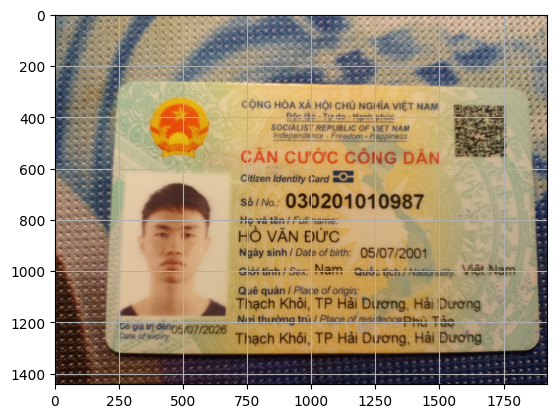

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = cv2.imread(img_path)
image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(image, cmap='gray')
plt.grid(True)

In [16]:
from postprocess import PostProcess

image = np.array(image)
post = PostProcess()
imgs = post(image, contours, unclip_ratio=1.5)

In [17]:
sys.path.append('./TextRecognition/')
from Recognition.ocr.tools.predictor import Predictor
from Recognition.ocr.tools.config import Cfg

In [18]:
config = Cfg.load_config_from_name('vgg_transformer')

<Response [200]>
<Response [200]>


In [19]:
config['predictor']['import'] = './test/test3.pth'
config['predictor']['beamsearch'] = True

In [20]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"€#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~²“−” ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 4000,
  'iters': 100000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': None},
 'dataset': {'name': 'data',
  'data_root': './img/',
  'train_annotation': 'annotation_train.txt',
  'valid_annotation': 'annotation_val_small.txt',
  'image_height': 32,
  'image_min_width': 32,
  

In [21]:
detector = Predictor(config)

{'a': 4, 'A': 5, 'à': 6, 'À': 7, 'ả': 8, 'Ả': 9, 'ã': 10, 'Ã': 11, 'á': 12, 'Á': 13, 'ạ': 14, 'Ạ': 15, 'ă': 16, 'Ă': 17, 'ằ': 18, 'Ằ': 19, 'ẳ': 20, 'Ẳ': 21, 'ẵ': 22, 'Ẵ': 23, 'ắ': 24, 'Ắ': 25, 'ặ': 26, 'Ặ': 27, 'â': 28, 'Â': 29, 'ầ': 30, 'Ầ': 31, 'ẩ': 32, 'Ẩ': 33, 'ẫ': 34, 'Ẫ': 35, 'ấ': 36, 'Ấ': 37, 'ậ': 38, 'Ậ': 39, 'b': 40, 'B': 41, 'c': 42, 'C': 43, 'd': 44, 'D': 45, 'đ': 46, 'Đ': 47, 'e': 48, 'E': 49, 'è': 50, 'È': 51, 'ẻ': 52, 'Ẻ': 53, 'ẽ': 54, 'Ẽ': 55, 'é': 56, 'É': 57, 'ẹ': 58, 'Ẹ': 59, 'ê': 60, 'Ê': 61, 'ề': 62, 'Ề': 63, 'ể': 64, 'Ể': 65, 'ễ': 66, 'Ễ': 67, 'ế': 68, 'Ế': 69, 'ệ': 70, 'Ệ': 71, 'f': 72, 'F': 73, 'g': 74, 'G': 75, 'h': 76, 'H': 77, 'i': 78, 'I': 79, 'ì': 80, 'Ì': 81, 'ỉ': 82, 'Ỉ': 83, 'ĩ': 84, 'Ĩ': 85, 'í': 86, 'Í': 87, 'ị': 88, 'Ị': 89, 'j': 90, 'J': 91, 'k': 92, 'K': 93, 'l': 94, 'L': 95, 'm': 96, 'M': 97, 'n': 98, 'N': 99, 'o': 100, 'O': 101, 'ò': 102, 'Ò': 103, 'ỏ': 104, 'Ỏ': 105, 'õ': 106, 'Õ': 107, 'ó': 108, 'Ó': 109, 'ọ': 110, 'Ọ': 111, 'ô': 112, 'Ô': 113, '

In [22]:
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

torch.Size([1, 3, 32, 380])


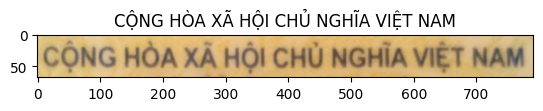

torch.Size([1, 3, 32, 200])


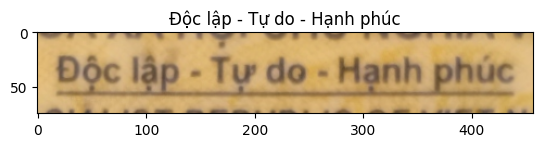

torch.Size([1, 3, 32, 280])


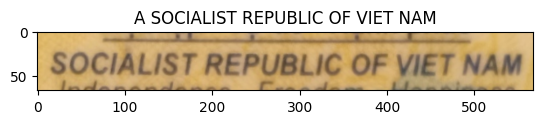

torch.Size([1, 3, 32, 150])


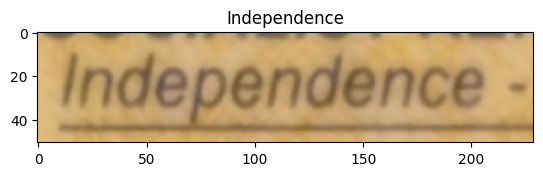

torch.Size([1, 3, 32, 170])


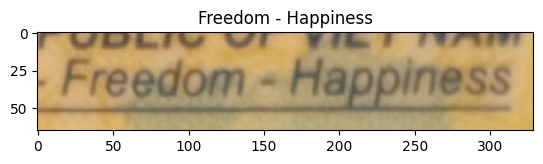

torch.Size([1, 3, 32, 250])


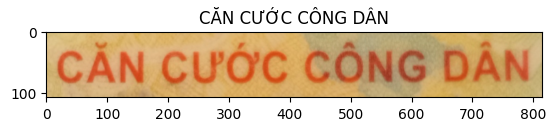

torch.Size([1, 3, 32, 150])


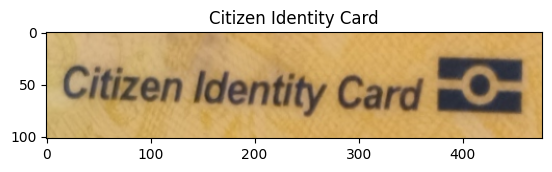

torch.Size([1, 3, 32, 160])


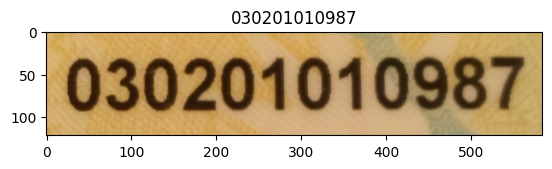

torch.Size([1, 3, 32, 80])


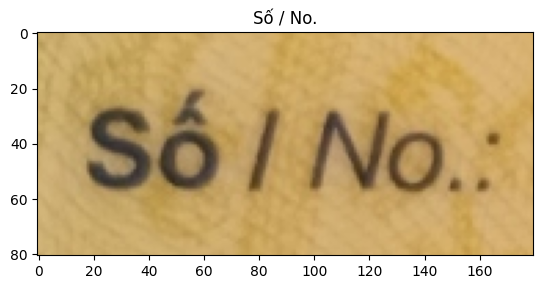

torch.Size([1, 3, 32, 190])


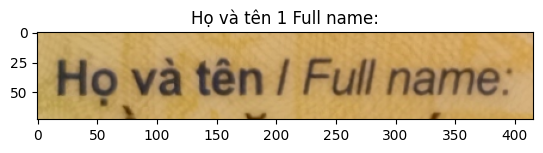

torch.Size([1, 3, 32, 130])


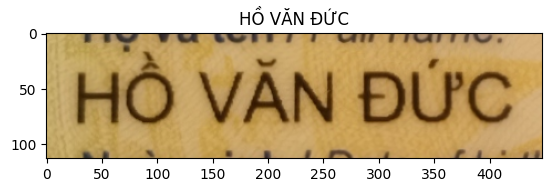

torch.Size([1, 3, 32, 310])


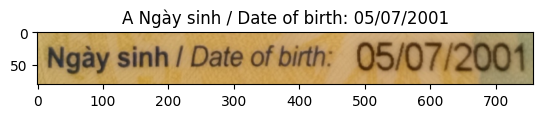

torch.Size([1, 3, 32, 390])


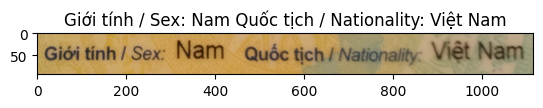

torch.Size([1, 3, 32, 210])


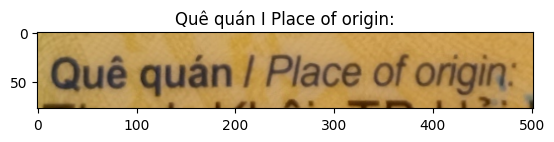

torch.Size([1, 3, 32, 300])


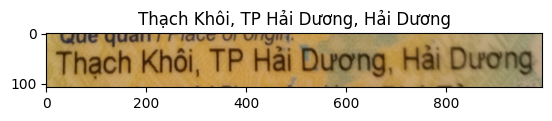

torch.Size([1, 3, 32, 270])


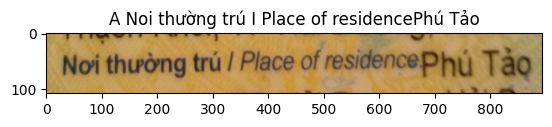

torch.Size([1, 3, 32, 140])


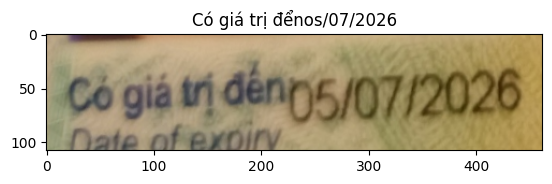

torch.Size([1, 3, 32, 100])


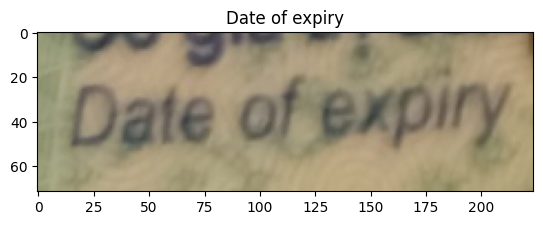

torch.Size([1, 3, 32, 340])


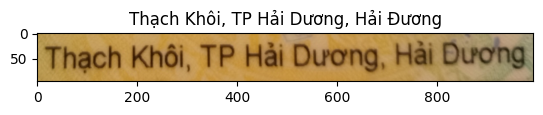

In [23]:
imgs.reverse()
for img in imgs:
    img = Image.fromarray(img)
    plt.imshow(img)
    s = detector.predict(img)
    plt.title(s)
    plt.show()

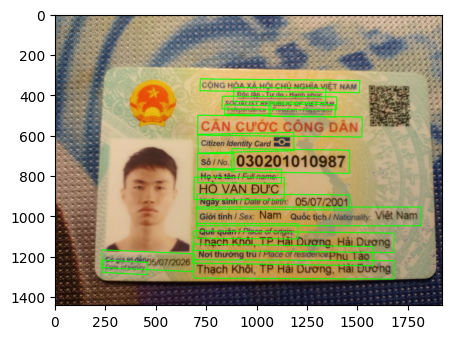

In [24]:
cv2.drawContours(image, post.contours, -1, (0, 255, 0), 3)
plt.figure(figsize=(5, 15))
plt.imshow(image)